<font size=6><b> 데이콘 Basic 칼로리 소모량 예측 AI 경진대회

* ref : https://dacon.io/competitions/official/236097/overview/description

<pre>
ID : 샘플 별 고유 id
Exercise_Duration  : 운동 시간(분)
Body_Temperature(F) : 체온
BPM : 심박수
Height(Feet) : 키(피트)
Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
Weight(lb) : 몸무게(파운드)
Weight_Status : 체중 상태
Gender : 성별
Age : 나이
Calories_Burned : 칼로리 소모량(목표 예측값)

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

sns.set() 
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'  # 한글 처리
plt.rcParams['axes.unicode_minus'] = False  # -, $ 등등에 표현 특수기호로 버리지 말고 다 써줘라.

In [63]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


# EDA

## Drop ID

In [65]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   object 
 7   Gender                    7500 non-null   object 
 8   Age                       7500 non-null   int64  
 9   Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 586.1+ KB


## hist, pair plot

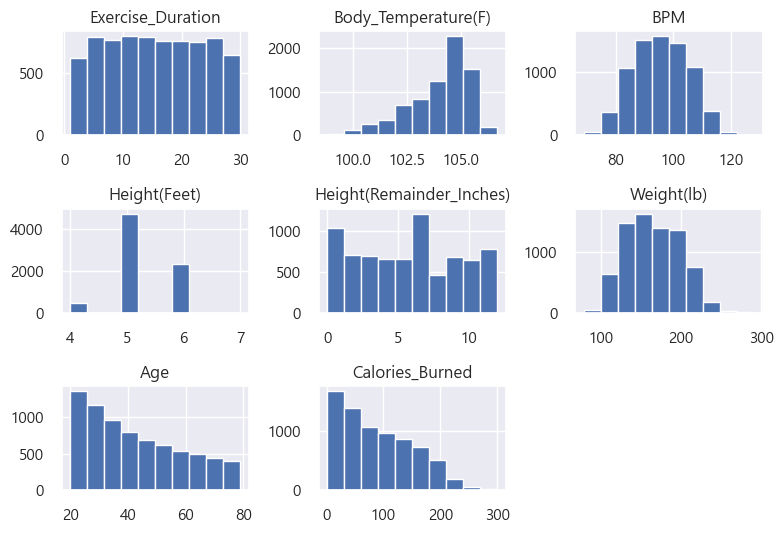

In [67]:
train.hist()
plt.tight_layout()
plt.show()

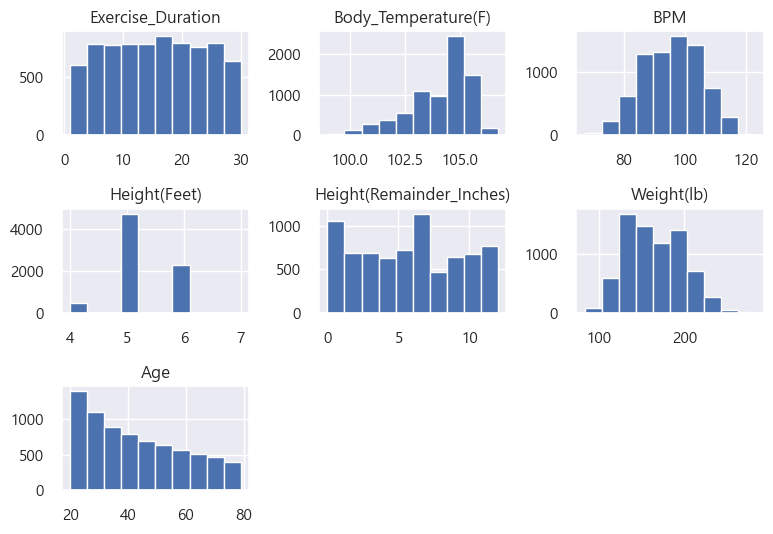

In [68]:
test.hist()
plt.tight_layout()
plt.show()

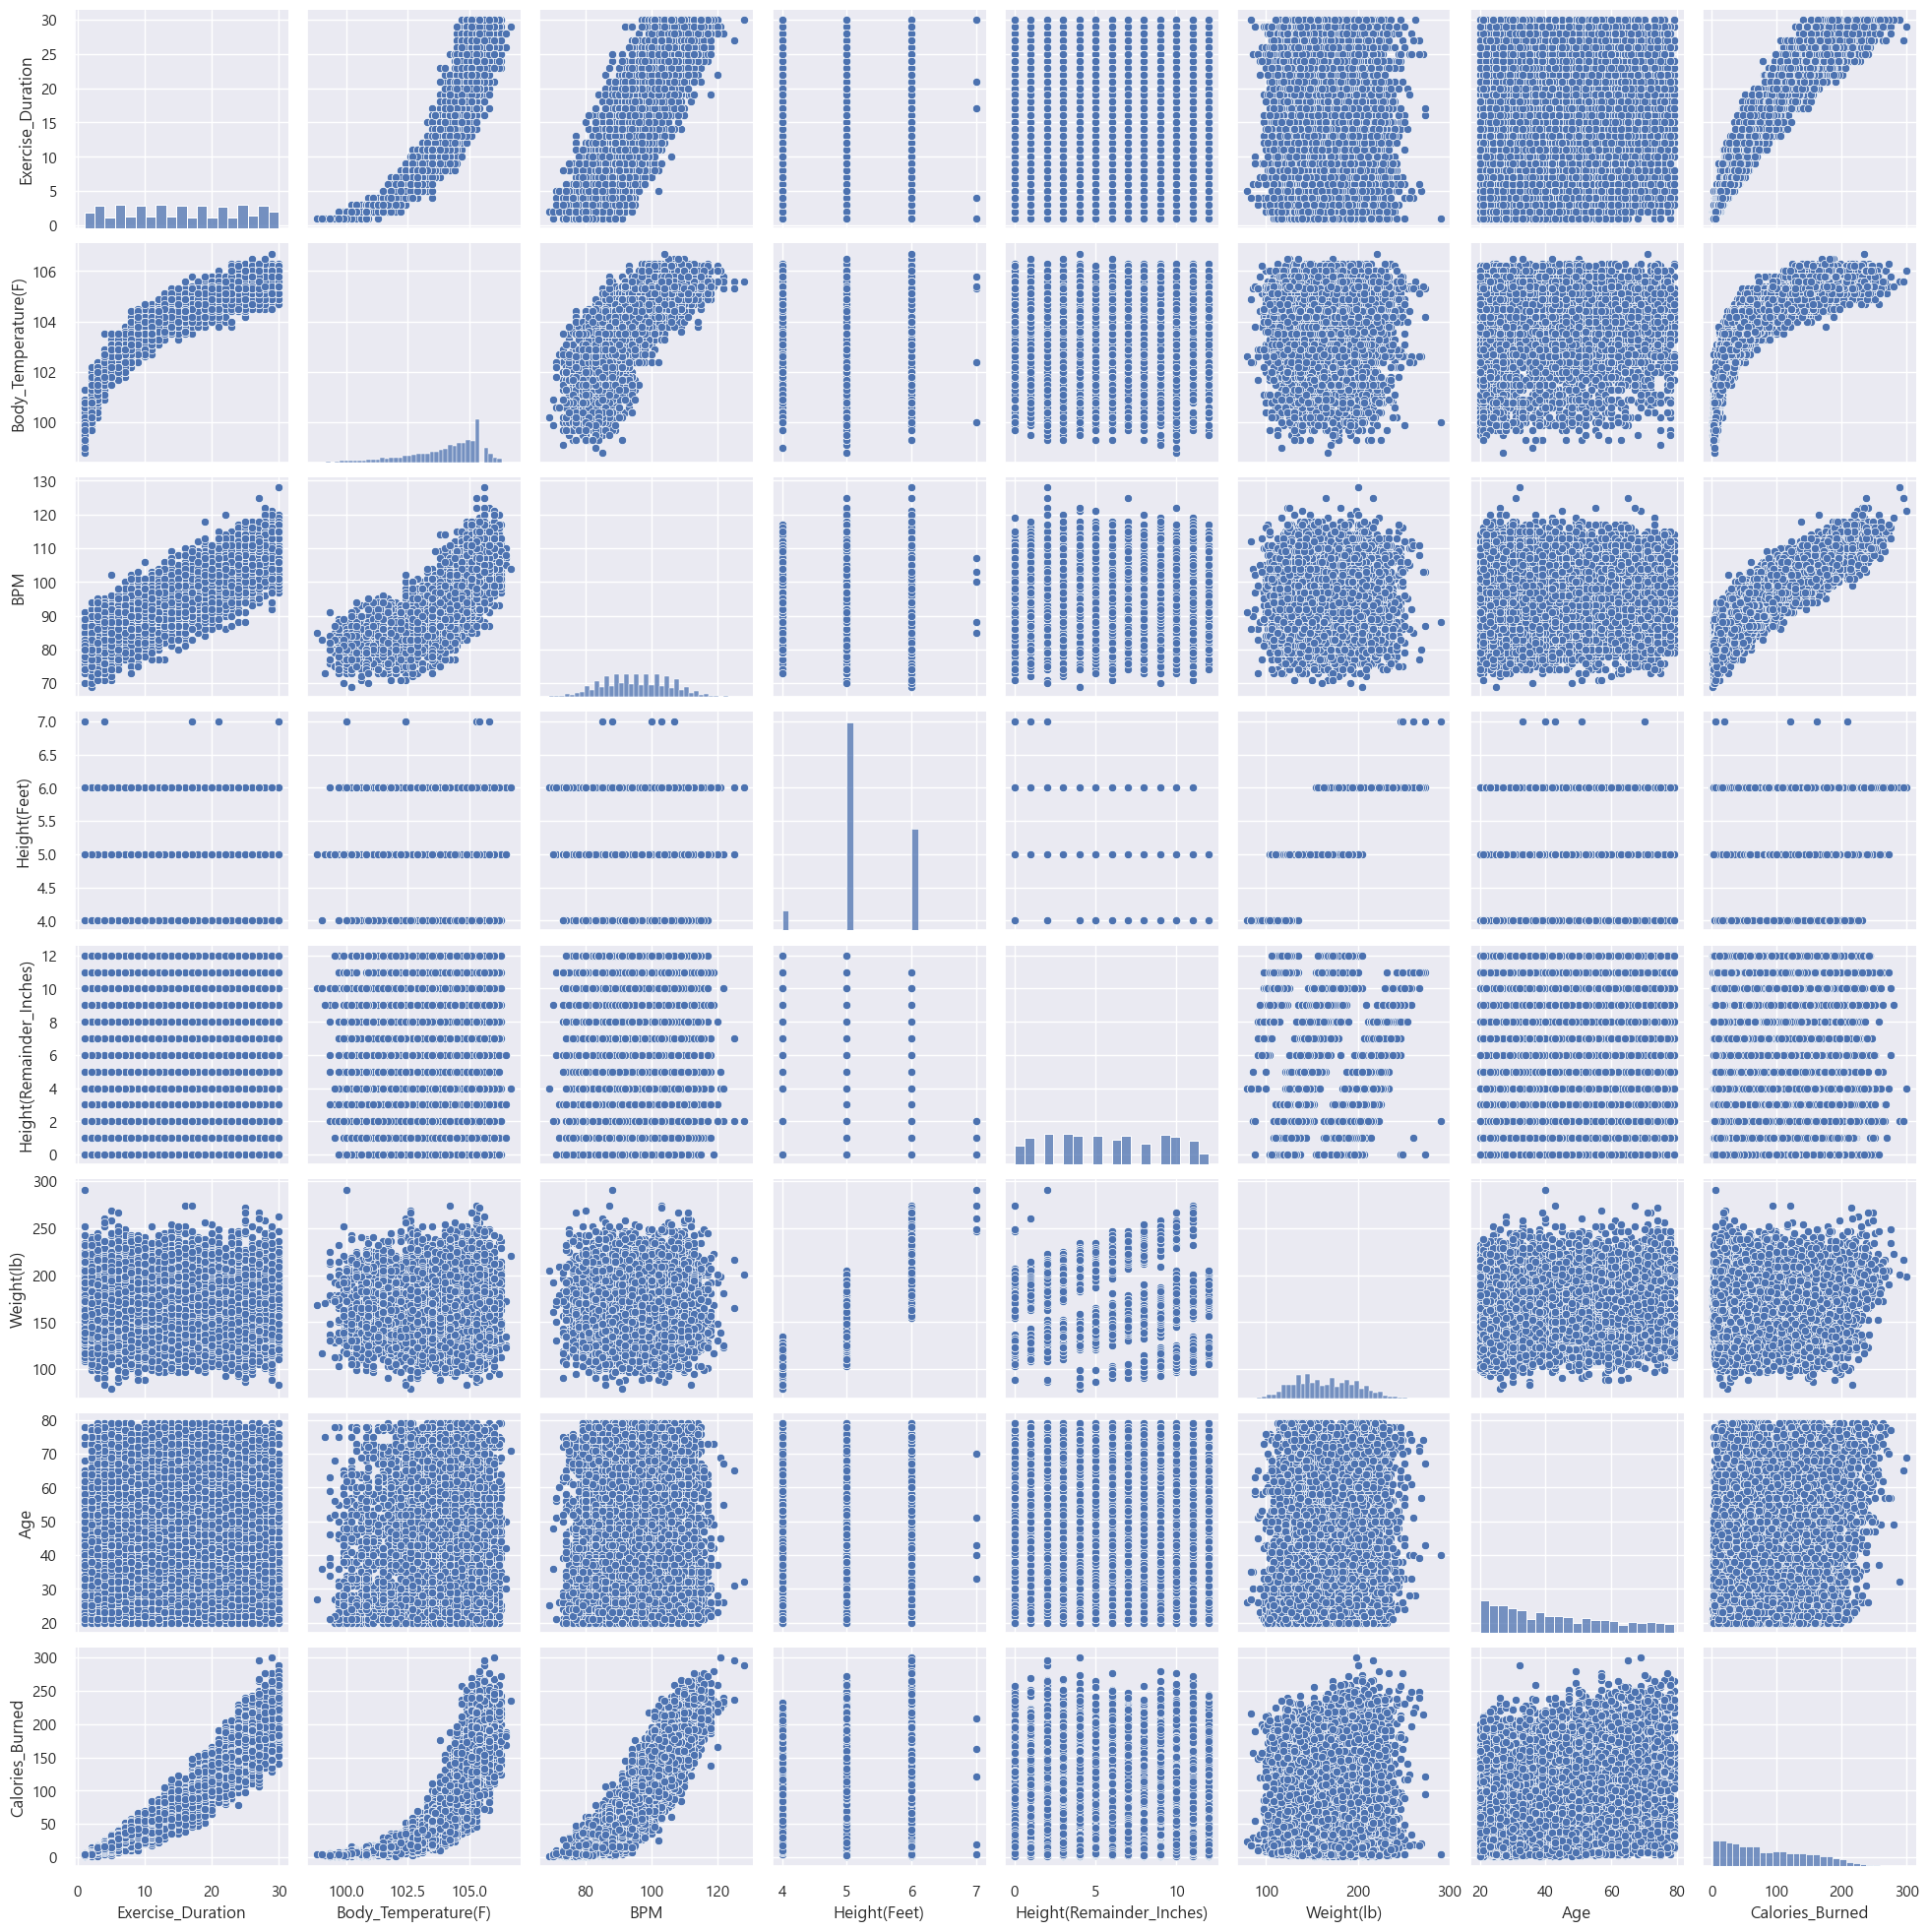

In [69]:
sns.pairplot(train)
plt.show()

## Height

In [71]:
train['Height(Inches)'] = train['Height(Feet)']*12
train['Height(Inches)'] = train['Height(Inches)'] + train['Height(Remainder_Inches)']

test['Height(Inches)'] = test['Height(Feet)']*12
test['Height(Inches)'] = test['Height(Inches)'] + test['Height(Remainder_Inches)']

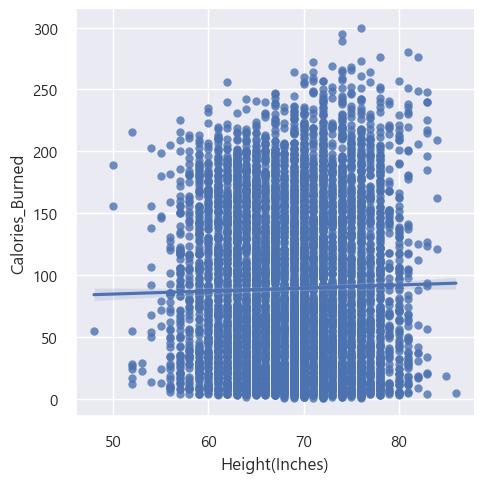

In [72]:
sns.lmplot(train, x = 'Height(Inches)', y='Calories_Burned')
plt.show()

## bmi

In [73]:
train['Height(m)'] = train['Height(Inches)']/39.37
test['Height(m)'] = test['Height(Inches)']/39.37

train['Weight(kg)'] = train['Weight(lb)']/2.205
test['Weight(kg)'] = test['Weight(lb)']/2.205

In [74]:
train['bmi'] = train['Weight(kg)']/(train['Height(m)']**2)
test['bmi'] = test['Weight(kg)']/(test['Height(m)']**2)

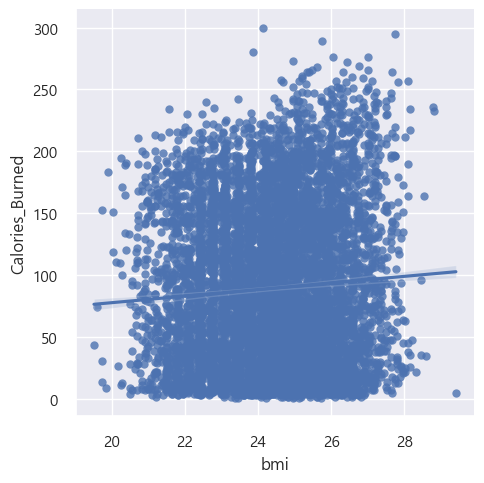

In [75]:
sns.lmplot(train, x = 'bmi', y='Calories_Burned')
plt.show()

## Weight_Status

In [76]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse=False)
oh.fit(train['Weight_Status'].values.reshape(-1,1))
temp = oh.transform(train['Weight_Status'].values.reshape(-1,1))
temp = pd.DataFrame(temp, columns=['Normal', 'Obese', 'OverWeight'])
train = pd.concat([train, temp], axis=1)

temp = oh.transform(test['Weight_Status'].values.reshape(-1,1))
temp = pd.DataFrame(temp, columns=['Normal', 'Obese', 'OverWeight'])
test = pd.concat([test, temp], axis=1)

## 상관관계

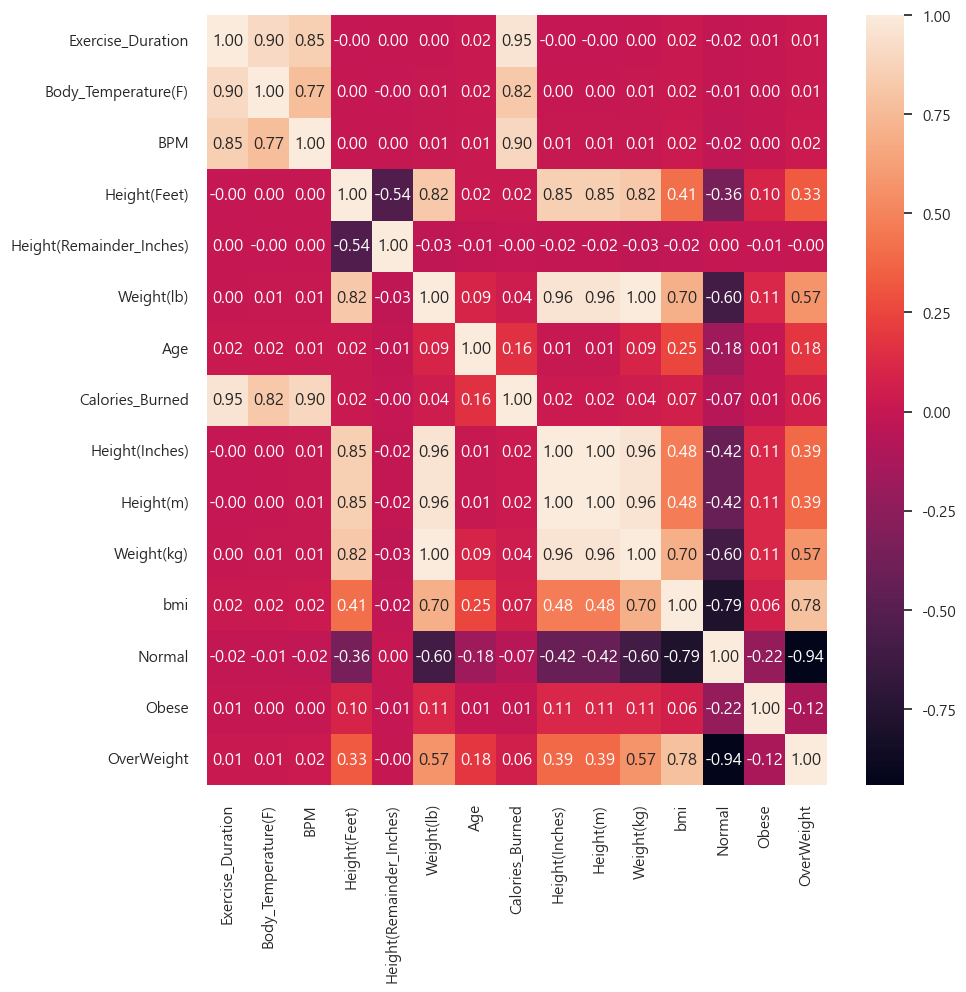

In [77]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), fmt='.2f',annot=True)
plt.show()

In [78]:
train.columns

Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned', 'Height(Inches)', 'Height(m)', 'Weight(kg)',
       'bmi', 'Normal', 'Obese', 'OverWeight'],
      dtype='object')

In [79]:
train['Gender'] = train['Gender'].replace(['F','M'], [0, 1])
test['Gender'] = test['Gender'].replace(['F','M'], [0, 1])

# Model Selection

In [ ]:
# from pycaret.regression import *

# col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
#        'bmi', 'Normal', 'Obese', 'OverWeight', 'Calories_Burned'] 
# train2 = train[col_list]
# s = setup(train2, target = 'Calories_Burned', silent=True, profile=True) #, feature_selection = True)
# best_model_list = compare_models(sort='MSE', n_select = 2, budget_time = 0.5)

In [ ]:
# models()

# 학습 및 검증

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
from xgboost import XGBRegressor

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

trainX = train[col_list]
trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]

model = XGBRegressor(random_state=11)

# train data score
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')

model.fit(trainX, trainy)
pred = model.predict(testX)
pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v1.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

ss = StandardScaler()

trainX = train[col_list]
ss.fit(trainX)
trainX = ss.transform(trainX)

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]
testX = ss.transform(testX)

model = XGBRegressor(random_state=11)


kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')


model.fit(trainX, trainy)
pred = model.predict(testX)

pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v2.csv', index=False)

In [ ]:
from catboost import CatBoostRegressor
import catboost as cb

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

ss = StandardScaler()

trainX = train[col_list]
ss.fit(trainX)
trainX = ss.transform(trainX)

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]
testX = ss.transform(testX)

model = CatBoostRegressor(random_seed=11, loss_function='RMSE')

kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')
# 0.02094423225763099

model.fit(trainX, trainy,  verbose=False)
pred = model.predict(testX)

pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v3.csv', index=False)

# AutoML

In [ ]:
import os

from supervised.automl import AutoML

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

trainX = train[col_list]
trainX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']]= np.log1p(trainX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']])

testX = test[col_list]
testX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']] = np.log1p(testX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']])



automl = AutoML(mode="Compete", eval_metric='rmse')

automl.fit(trainX, trainy)

y_pred = automl.predict(testX)

y_pred = np.expm1(y_pred)

result = pd.read_csv('./datasets/sample_submission.csv')
result['Calories_Burned'] = y_pred
result.to_csv('./submit_v6.csv', index=False)